In [5]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"
import numpy as np
import matplotlib.pyplot as plt
from torch import nn,optim
from torch.autograd import Variable
import torch

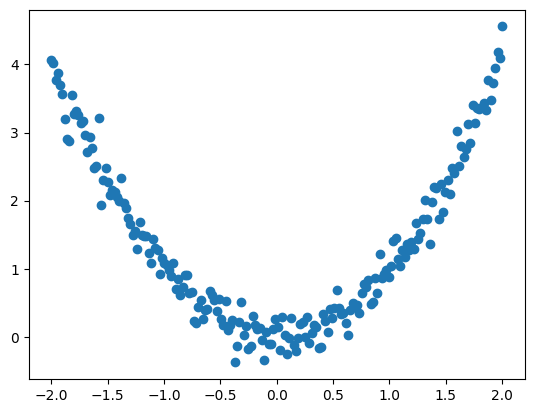

In [6]:
x_data=np.linspace(-2,2,200)[:,np.newaxis]
noise=np.random.normal(0,0.2,x_data.shape)
y_data=np.square(x_data)+noise
plt.scatter(x_data,y_data)
plt.show()

In [8]:
#change numpy to tensor 
inputs=Variable(torch.FloatTensor(x_data.reshape(-1,1)))
target=Variable(torch.FloatTensor(y_data.reshape(-1,1)))
print(inputs)
print(target)

tensor([[-2.0000],
        [-1.9799],
        [-1.9598],
        [-1.9397],
        [-1.9196],
        [-1.8995],
        [-1.8794],
        [-1.8593],
        [-1.8392],
        [-1.8191],
        [-1.7990],
        [-1.7789],
        [-1.7588],
        [-1.7387],
        [-1.7186],
        [-1.6985],
        [-1.6784],
        [-1.6583],
        [-1.6382],
        [-1.6181],
        [-1.5980],
        [-1.5779],
        [-1.5578],
        [-1.5377],
        [-1.5176],
        [-1.4975],
        [-1.4774],
        [-1.4573],
        [-1.4372],
        [-1.4171],
        [-1.3970],
        [-1.3769],
        [-1.3568],
        [-1.3367],
        [-1.3166],
        [-1.2965],
        [-1.2764],
        [-1.2563],
        [-1.2362],
        [-1.2161],
        [-1.1960],
        [-1.1759],
        [-1.1558],
        [-1.1357],
        [-1.1156],
        [-1.0955],
        [-1.0754],
        [-1.0553],
        [-1.0352],
        [-1.0151],
        [-0.9950],
        [-0.9749],
        [-0.

In [16]:
#architment neural network
class NonLinearRegression(nn.Module):
    #define network
    def __init__(self):
        #initialize module
        super(NonLinearRegression,self).__init__()
        #input-hidden layer-output
        self.fc1=nn.Linear(1,10)
        self.tanh=nn.Tanh()
        self.fc2=nn.Linear(10,1)
    #define gradient 
    def forward(self,x):
        x=self.fc1(x)
        x=self.tanh(x)
        x=self.fc2(x)
        return x

In [23]:
#define module
model=NonLinearRegression()
#define loss function
mse_loss=nn.MSELoss()
#define optimizer
optimizer=optim.SGD(model.parameters(),lr=0.05)
#list function name and parameter value
for name, parameters in model.named_parameters():
    print('name:{},param:{}'.format(name, parameters))

name:fc1.weight,param:Parameter containing:
tensor([[-0.9707],
        [ 0.8574],
        [-0.3179],
        [-0.9320],
        [-0.4128],
        [ 0.1322],
        [-0.5673],
        [ 0.5048],
        [-0.6718],
        [-0.3297]], requires_grad=True)
name:fc1.bias,param:Parameter containing:
tensor([-0.6502,  0.0971,  0.6239,  0.8577, -0.5034,  0.4227,  0.7131, -0.1606,
        -0.1663, -0.6372], requires_grad=True)
name:fc2.weight,param:Parameter containing:
tensor([[ 0.2676,  0.2144,  0.2872, -0.2387, -0.2919,  0.3145, -0.2791, -0.1614,
          0.0520,  0.1345]], requires_grad=True)
name:fc2.bias,param:Parameter containing:
tensor([0.1968], requires_grad=True)


0 0.038984593003988266
200 0.03890332207083702
400 0.03882615640759468
600 0.038752928376197815
800 0.038683488965034485
1000 0.03861766308546066
1200 0.03855527937412262
1400 0.038496192544698715
1600 0.038440294563770294
1800 0.038387395441532135
2000 0.03833736851811409
2200 0.038290105760097504
2400 0.038245439529418945
2600 0.03820325806736946
2800 0.0381634458899498
3000 0.03812588378787041
3200 0.03809043765068054
3400 0.03805701807141304
3600 0.03802551329135895
3800 0.0379958339035511
4000 0.03796785697340965
4200 0.037941526621580124
4400 0.03791669011116028
4600 0.037893325090408325
4800 0.03787131607532501
5000 0.03785059601068497


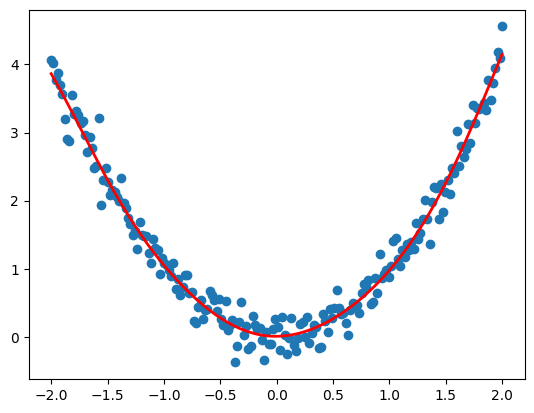

In [25]:
#training networks
for i in range(5001):
    out= model(inputs)
    #calculate loss
    loss=mse_loss(out,target)
    #initial gradient value
    optimizer.zero_grad()
    #calculate gradient
    loss.backward()
    #training weight value
    optimizer.step()
    if i%200==0:
        print(i,loss.item())
#plot training result
y_pred=model(inputs)
plt.scatter(x_data,y_data)
plt.plot(x_data,y_pred.data.numpy(),'r-',lw=2)
plt.show()